# Синусоидальный сигнал DFT-slow и FFT

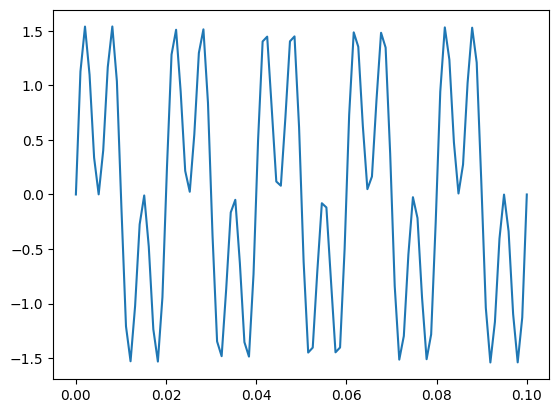

Text(0, 0.5, 'Амплитуда')

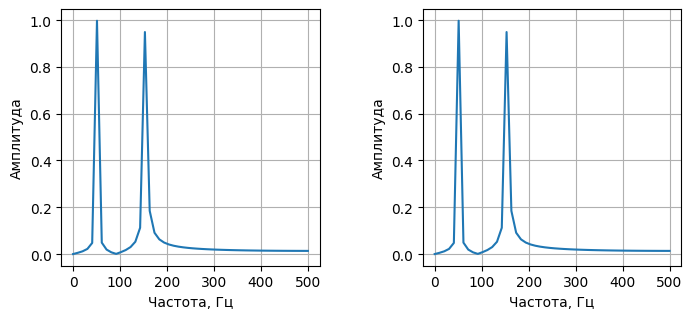

In [12]:
import numpy as np
from scipy.fftpack import fft, ifft
from  scipy.signal import square
import matplotlib.pyplot as plt
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
N = 100 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x)+np.sin((f+100) * 2.0*np.pi*x) #

plt.plot(x,y)
plt.show()
yf = DFT_slow(y)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

In [2]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

63.1 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
23.6 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Восстановленный синусоидальный сигнал

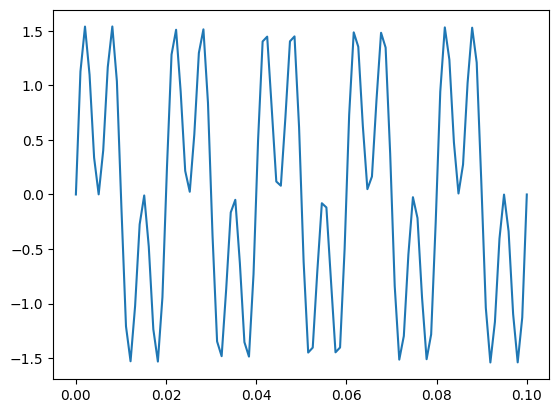

In [13]:
i_y = ifft(yff)
plt.plot(x,i_y)


# Восстановленный с шумами

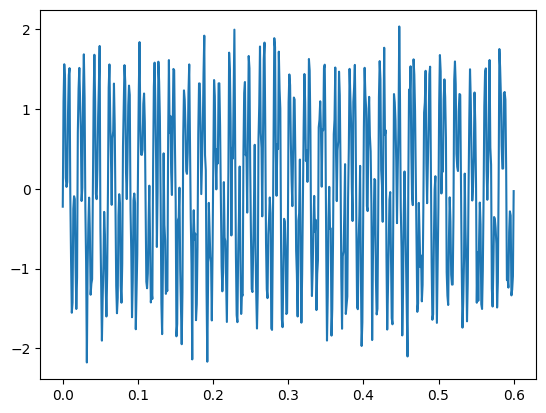

In [4]:
yff += np.random.normal(0,10,yff.shape)
i_y = ifft(yff)
plt.plot(x,i_y)


In [14]:
def DFT_fast(signal):
    N = signal.shape[0]

    W_N_kn = lambda _N, _k, _n: np.exp(-2j * np.pi * _k * _n / _N)
    
def FFT(signal):
    _signal = np.asarray(signal, dtype=float)
    N = _signal.shape[0]
    
    n = np.arange(N)
    k = n.reshape(-1, 1)

    M = np.exp(-2j * np.pi * n * k / N)
    spectrum = np.dot(M, _signal.reshape(N, -1))

    while spectrum.shape[0] < N:
        spectrum_even = spectrum[:, :spectrum.shape[1] // 2]
        spectrum_odd = spectrum[:, spectrum.shape[1] // 2:]
        factor = np.exp(-1j * np.pi * np.arange(spectrum.shape[0]) / spectrum.shape[0]).reshape(-1, 1)
        spectrum = np.vstack([spectrum_even + factor * spectrum_odd, spectrum_even - factor * spectrum_odd])

    return spectrum.reshape(-1)

In [15]:
def meandr(t,A,T):
    return A * square(2 * np.pi / T * t)


# Меандр и его спектр

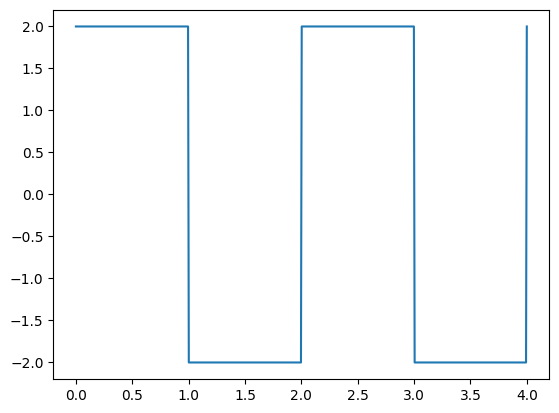

(0.0, 50.0)

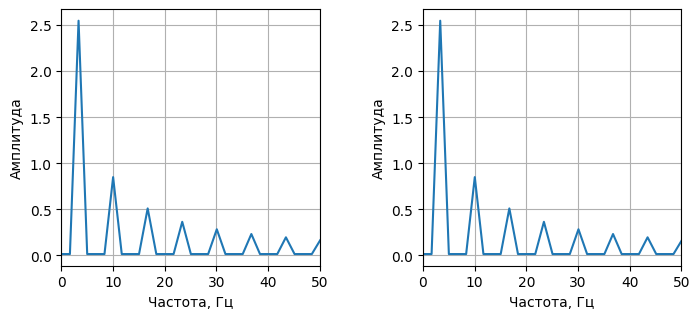

In [20]:
N = 600 # Количество отсчетов
A=2
T = 2
x = np.linspace(0.0, 4, N)
y = np.array([meandr(t,A,T) for t in x])
plt.plot(x,y)
plt.show()

yf = DFT_slow(y)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.xlim(0,50)
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.xlim(0,50)

# Спектр меандра с шумом

(0.0, 50.0)

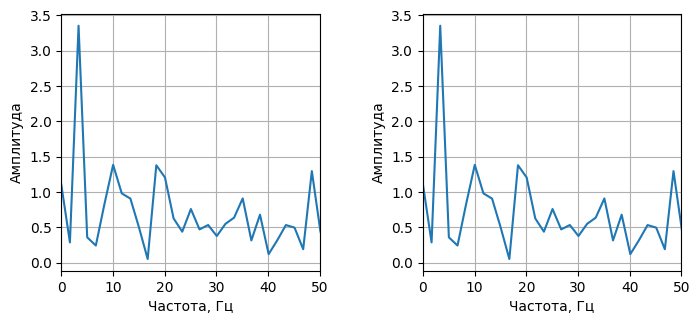

In [19]:
y += np.random.normal(0,5,y.shape)
yf = DFT_slow(y)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.xlim(0,50)
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.xlim(0,50)

# Синусиодальный сигнал и сравнение встроенного FFT и самописного

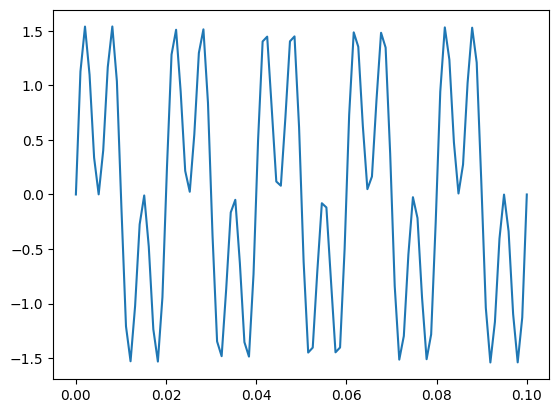

Text(0, 0.5, 'Амплитуда')

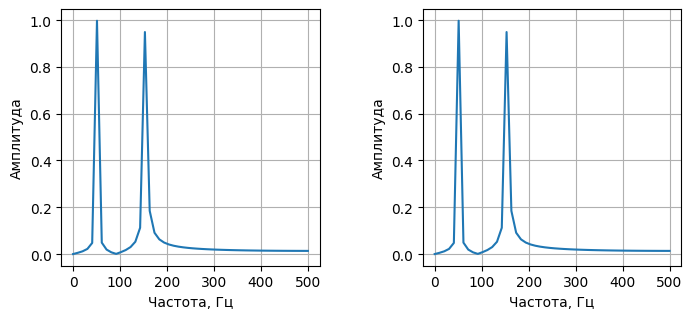

In [9]:
N = 100 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x) + np.sin((f+100) * 2.0*np.pi*x) #
plt.plot(x,y)
plt.show()
yf = FFT(y)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

In [10]:
def cosinus_signal_func(freq = None, T = None, init_phase = 0):
    if freq:
        w = 2 * np.pi * freq
    elif T:
        w = 2 * np.pi / T
    else:
        return None
    cos_func = lambda t: np.cos(t * w + init_phase)

    return cos_func

def calc_signal(s_func, t_start = 0, t_end = None, t_step = None):
    if t_end is None:
        t_end = 2
    if t_step is None:
        t_step = 0.01

    time_series = np.arange(t_start, t_end, t_step)
    signal_vals = np.array([s_func(t) for t in time_series])

    return signal_vals, time_series

In [11]:
import timeit
cos_50hz_f  = cosinus_signal_func(freq= 50)
cos_150hz_f = cosinus_signal_func(freq= 150)

cos_50hz_signal, t_series_50hz = calc_signal(cos_50hz_f, t_end=0.2, t_step=0.001)
cos_150hz_signal, t_series_150hz = calc_signal(cos_150hz_f, t_end=2, t_step=0.01)

cos_50hz_150hz_signal = cos_50hz_signal + cos_150hz_signal

cos_50hz_signal, t_series_50hz = calc_signal(cos_50hz_f, t_end=0.3, t_step=0.01)

runs_count = 100

spectrum_fft_50hz_time = timeit.timeit(lambda: np.fft.fft(cos_150hz_signal), number=runs_count)
spectrum_fft_50hz = np.fft.fft(cos_150hz_signal)

spectrum_myfft_50hz_time = timeit.timeit(lambda: FFT(cos_150hz_signal), number=runs_count)
spectrum_myfft_50hz = FFT(cos_150hz_signal)

print(f"""fft ({runs_count} times):
      50hz: {spectrum_fft_50hz_time:.4f} sec""")
print(f"""my fft ({runs_count} times):
      50hz: {spectrum_myfft_50hz_time:.4f} sec""")
print(f"fft is {spectrum_fft_50hz_time/spectrum_myfft_50hz_time:.1f} times faster")

fft (100 times):
      50hz: 0.0014 sec
my fft (100 times):
      50hz: 0.6716 sec
fft is 0.0 times faster
